0 __header__
1 __version__
2 __globals__
3 sv
0 __header__
1 __version__
2 __globals__
3 sv
[1.00000000e-03 2.06913808e-03 4.28133240e-03 8.85866790e-03
 1.83298071e-02 3.79269019e-02 7.84759970e-02 1.62377674e-01
 3.35981829e-01 6.95192796e-01 1.43844989e+00 2.97635144e+00
 6.15848211e+00 1.27427499e+01 2.63665090e+01 5.45559478e+01
 1.12883789e+02 2.33572147e+02 4.83293024e+02 1.00000000e+03]
[0.5050555555555556, 0.6029305555555556, 0.5890416666666667, 0.6472083333333334, 0.7610555555555555, 0.813, 0.8446527777777778, 0.8646944444444445, 0.8823611111111112, 0.8983888888888888, 0.9118888888888887, 0.9228194444444444, 0.9324999999999999, 0.9393472222222222, 0.9422499999999999, 0.9419722222222223, 0.939875, 0.9374583333333334, 0.91525, 0.835625]


([<matplotlib.axis.XTick at 0x1b99ddffa30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

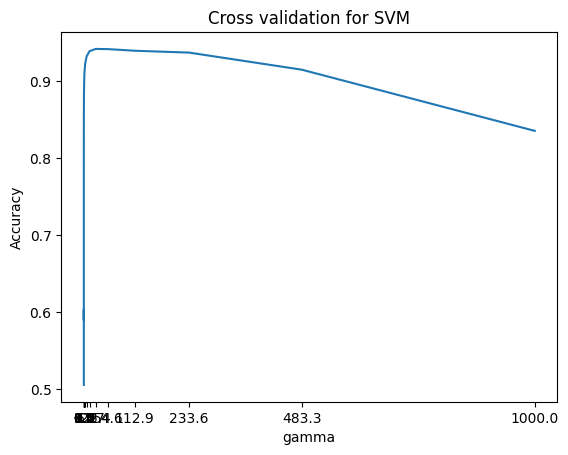

In [1]:
"""Classifiers comparision"""
# SEP 786 Project report
# Yu Zhang         400429707
# Xiaoyu Jiang     400057533
# Mingming Zhang   400349051

from sklearn.preprocessing import StandardScaler
import sys
import matplotlib.pyplot as plt
import numpy as np
import sklearn.discriminant_analysis
from sklearn import svm
import pandas as pd

from function_plot import Load_mat_single
from function_plot import mat_to_array
from function_plot import plot_confusion_matrix
from function_plot import train_test


import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

np.random.seed(10)
random_state = np.random.RandomState(10)

"""Load Data"""
# Path
path_good = 'data//baseline_20220915_sv.mat'
path_bad = 'data//fault7_20220915_sv.mat'
# Load the .mat files
mat_contents_good = Load_mat_single(path_good)
mat_contents_bad = Load_mat_single(path_bad)

# Convert to Numpy array
good_data = mat_to_array(mat_contents_good)
bad_data = mat_to_array(mat_contents_bad)

# Debug flag about time
show_time = True

"""Construct the data"""
# Merge the data
# constuct the data

X = np.concatenate((good_data, bad_data))

# Create the label
n_sample = good_data.shape[0]


Y = np.zeros(n_sample)
Y = np.concatenate((Y, np.ones(n_sample)))


"""Category the data"""

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=random_state)

# -------------- Perform cross-validation--------------


# find best gamma for Support vector machines

# gamma_range = np.logspace(-3, 3, 20)
# param_grid = dict(gamma=gamma_range)
# cv = StratifiedShuffleSplit(
# 	n_splits=5, test_size=0.2, random_state=random_state)
# grid = GridSearchCV(svm.SVC(cache_size=500), param_grid=param_grid, cv=cv)
# grid.fit(X_train, Y_train)

# best_gamma = grid.best_params_['gamma']
# test_score = grid.cv_results_['mean_test_score']

# plt.figure()
# plt.plot(gamma_range,test_score)
# plt.xlabel('gamma')
# plt.ylabel('Accuracy')
# plt.title('Cross validation for SVM')

svm_accuracy = []

svm_clf = []
gamma_candidate = []

gamma_range = np.logspace(-3, 3, 20)
for i in gamma_range:

    svm_select = svm.SVC(cache_size=500, gamma= i)

    svm_clf.append(svm_select)
    cv_scores = cross_val_score(svm_select, X_train, Y_train, cv=5)
    svm_accuracy.append(cv_scores.mean())
    


svm_accuracy_max = max(svm_accuracy)

max_index = svm_accuracy.index(svm_accuracy_max)
best_gamma = gamma_range[max_index]

print(gamma_range)
print(svm_accuracy)

plt.figure()
plt.plot(gamma_range,svm_accuracy)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Cross validation for SVM')




# # K-Nearest Neighbours

# neigh_accuracy = []

# neigh = []
# k_candidate = []

# # find optimal k values
# # estm_k_neigh =[5,10,15,20]
# estm_k_neigh = 20
# for i in range(estm_k_neigh):

#     if i % 2 != 0:
#         knn = KNeighborsClassifier(n_neighbors=i)

#         neigh.append(knn)
#         cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
#         neigh_accuracy.append(cv_scores.mean())
#         k_candidate.append(i)


# neigh_accuracy_max = max(neigh_accuracy)

# max_index = neigh_accuracy.index(neigh_accuracy_max)
# best_k = k_candidate[max_index]

# plt.figure()
# plt.plot(k_candidate, neigh_accuracy)
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.title('Cross validation for KNN')
# plt.xticks(k_candidate)


Text(0.5, 1.0, 'Cross validation for SVM')

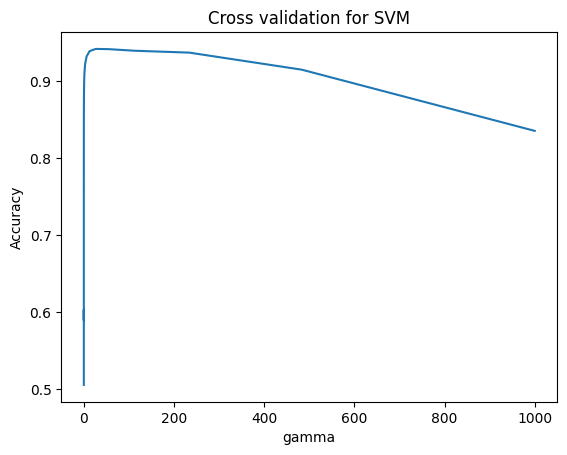

In [2]:
plt.figure()
plt.plot(gamma_range,svm_accuracy)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Cross validation for SVM')